In [1]:
# import os
# os.chdir("C:\\Users\\amanr\\OneDrive\\Desktop")

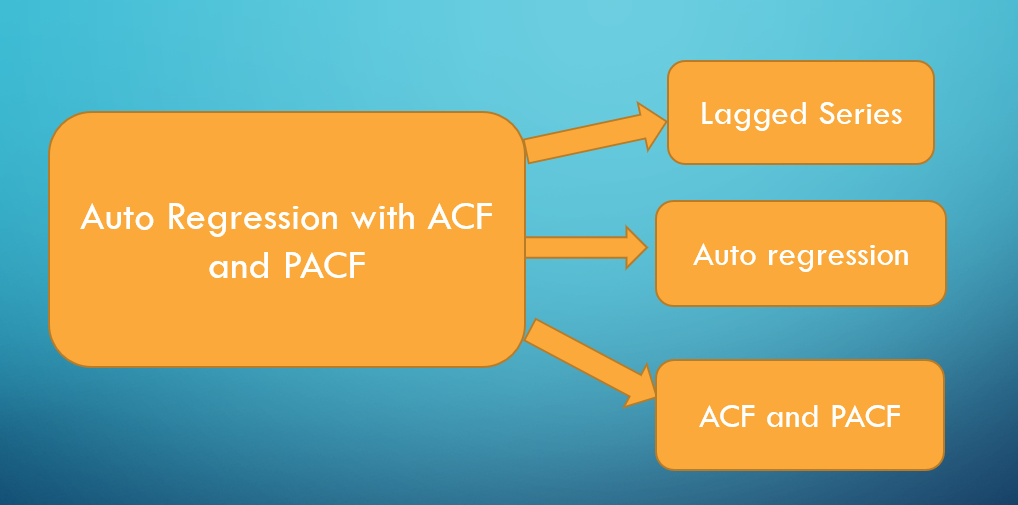

In [32]:
# from IPython.display import Image
# Image(filename='PACF.png') 

# Time series lag example
# Original time series = {21,22,21,20,19}
# Lagged time series by 1 lag = {22,21,20,19}

# Lag 1 correlation will be correlation between {21,22,21,20} and {22,21,20,19}

# What is Autoregression? - 
# A statistical model is autoregressive if it predicts future values based on past values.



# ACF Definition - A function which gives us values of auto-correlation of any series with its lagged values. 

# PACF Definition - An indirect function to find Auto correlation after removing the relationship explained by previous lags

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

import matplotlib
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
from statsmodels.tsa.stattools import acf, pacf

In [3]:
axisline = np.linspace(0, 10, 500)


# normal distributed values
normalnumbers = np.random.normal(0,5,500)

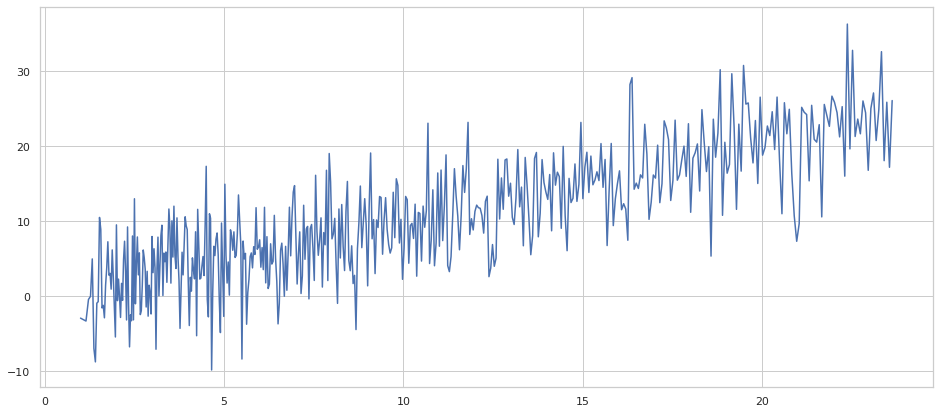

In [11]:
#exponential series to get the trend
ExponentialData = np.exp(axisline**0.5)

#adding normally distributed series in exponential series
y = normalnumbers+ExponentialData
t = ExponentialData

#plot
plt.figure(figsize=(16,7))
plt.plot(t,y)

## Calling ACF ( auto correlation function )

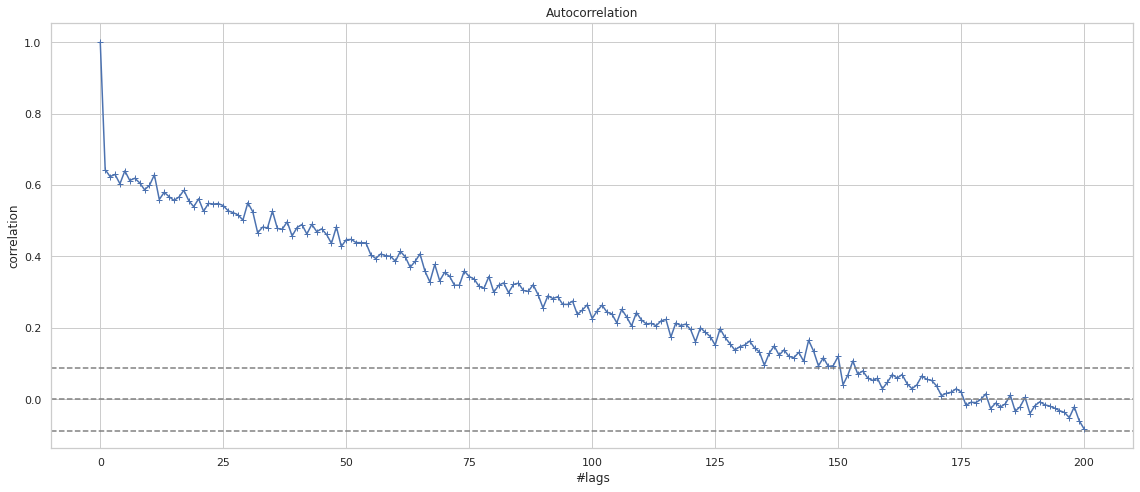

In [12]:
#calling auto correlation function
ACF_lag= acf(y, nlags=200)


#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(ACF_lag,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Autocorrelation')
plt.xlabel('#lags')
plt.ylabel('correlation')
plt.tight_layout()


#### Note 
#### Here , We have some or decent relation (correlation) upto 125 lags and It means that it can relate to previous 125 relations  
#### it could lead multi - collineairy problem if we go with 125 lags we want to limit lags
#### for that we have to go for PACF functions

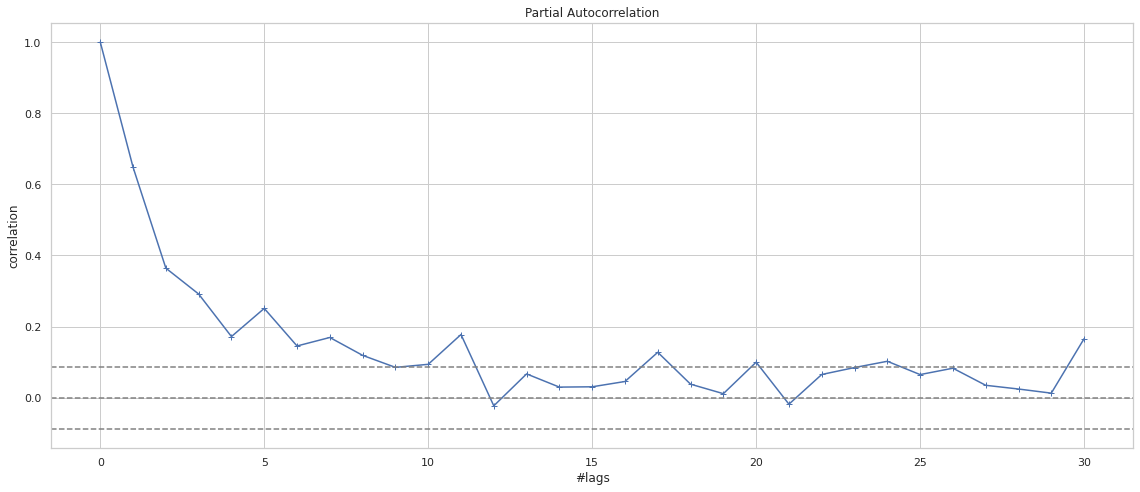

In [14]:
#calling partial correlation function
PACF_lag = pacf(y, nlags=30, method='ols')

#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(PACF_lag,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation')
plt.xlabel('#lags')
plt.ylabel('correlation')
plt.tight_layout()

### Here , We have some relation upto 6 ro 7 lags and correlation is 0.2 also

In [2]:
# AR(7)
# Note :
# It means that, taking the lag of 7 and use time series to predict the next values

#### PACF is advance version of that seeing how many lags are actualy impacted in time series after removing the noise 
#### It helps us to remove mutlit-collinearity problem while doing the Auto regression